<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Preparation" data-toc-modified-id="0.-Preparation-0">0. Preparation</a></span><ul class="toc-item"><li><span><a href="#0.1-Install-/-Load-Packages" data-toc-modified-id="0.1-Install-/-Load-Packages-0.1">0.1 Install / Load Packages</a></span></li><li><span><a href="#2.3-Swap-test" data-toc-modified-id="2.3-Swap-test-0.2">2.3 Swap test</a></span><ul class="toc-item"><li><span><a href="#2.3.1-The-procedure-of-the-Swap-Test" data-toc-modified-id="2.3.1-The-procedure-of-the-Swap-Test-0.2.1">2.3.1 The procedure of the Swap Test</a></span></li><li><span><a href="#2.3.2-The-quantum-circuit-of-the-Swap-test" data-toc-modified-id="2.3.2-The-quantum-circuit-of-the-Swap-test-0.2.2">2.3.2 The quantum circuit of the Swap test</a></span></li><li><span><a href="#Exercise-3.1:-Swap-test" data-toc-modified-id="Exercise-3.1:-Swap-test-0.2.3">Exercise 3.1: Swap test</a></span></li><li><span><a href="#Exercise-3.2:-Swap-test" data-toc-modified-id="Exercise-3.2:-Swap-test-0.2.4">Exercise 3.2: Swap test</a></span></li><li><span><a href="#Exercise-3.3:-Swap-test" data-toc-modified-id="Exercise-3.3:-Swap-test-0.2.5">Exercise 3.3: Swap test</a></span></li></ul></li><li><span><a href="#2.4-Hadamard-test" data-toc-modified-id="2.4-Hadamard-test-0.3">2.4 Hadamard test</a></span><ul class="toc-item"><li><span><a href="#2.4.1-The-procedure-of-the-Hadamard-test" data-toc-modified-id="2.4.1-The-procedure-of-the-Hadamard-test-0.3.1">2.4.1 The procedure of the Hadamard test</a></span></li><li><span><a href="#2.3.2-The-quantum-circuit-of-the-Hadamard-Test" data-toc-modified-id="2.3.2-The-quantum-circuit-of-the-Hadamard-Test-0.3.2">2.3.2 The quantum circuit of the Hadamard Test</a></span></li><li><span><a href="#Exercise-4.1:-Hadamard-test" data-toc-modified-id="Exercise-4.1:-Hadamard-test-0.3.3">Exercise 4.1: Hadamard test</a></span></li><li><span><a href="#Exercise-4.2:-Hadamard-test" data-toc-modified-id="Exercise-4.2:-Hadamard-test-0.3.4">Exercise 4.2: Hadamard test</a></span></li></ul></li><li><span><a href="#2.5-Deutsch-Jozsa-Algorithm" data-toc-modified-id="2.5-Deutsch-Jozsa-Algorithm-0.4">2.5 Deutsch-Jozsa Algorithm</a></span><ul class="toc-item"><li><span><a href="#2.5.1-The-procedure-of-the-Deutsch-Jozsa-Algorithm" data-toc-modified-id="2.5.1-The-procedure-of-the-Deutsch-Jozsa-Algorithm-0.4.1">2.5.1 The procedure of the Deutsch-Jozsa Algorithm</a></span></li><li><span><a href="#2.5.2-The-quantum-circuit-of-the-Deutsch-Jozsa-Algorithm" data-toc-modified-id="2.5.2-The-quantum-circuit-of-the-Deutsch-Jozsa-Algorithm-0.4.2">2.5.2 The quantum circuit of the Deutsch-Jozsa Algorithm</a></span><ul class="toc-item"><li><span><a href="#2.5.2.1-Import-code-functions-from-packages" data-toc-modified-id="2.5.2.1-Import-code-functions-from-packages-0.4.2.1">2.5.2.1 Import code functions from packages</a></span></li><li><span><a href="#2.5.2.2-Constant-Oracle" data-toc-modified-id="2.5.2.2-Constant-Oracle-0.4.2.2">2.5.2.2 Constant Oracle</a></span></li><li><span><a href="#2.5.2.3-Balanced-Oracle" data-toc-modified-id="2.5.2.3-Balanced-Oracle-0.4.2.3">2.5.2.3 Balanced Oracle</a></span></li><li><span><a href="#2.5.2.4-The-Full-Algorithm" data-toc-modified-id="2.5.2.4-The-Full-Algorithm-0.4.2.4">2.5.2.4 The Full Algorithm</a></span></li></ul></li><li><span><a href="#2.5.3-Generalized-circuit-code-of-Deutsch-Jozsa-Algorithm" data-toc-modified-id="2.5.3-Generalized-circuit-code-of-Deutsch-Jozsa-Algorithm-0.4.3">2.5.3 Generalized circuit code of Deutsch-Jozsa Algorithm</a></span></li></ul></li></ul></li></ul></div>

# 0. Preparation

## 0.1 Install / Load Packages
- We need to install or load packages before running the code below.

In [1]:
# Install packages

#!pip install numpy
#!pip install qiskit
#!pip install qiskit[visualization]
#!pip install matplotlib

In [2]:
# Load packages
## General tools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi

## Qiskit Circuit Functions
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *

In [3]:
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.tools.visualization import plot_gate_map, plot_error_map

In [4]:
# IBMQ.save_account(TOKEN)
# provider = IBMQ.load_account()
provider = IBMQ.load_account() # Load account from disk

In [5]:
# # Get the list of backends available
# provider.backends()

In [6]:
# Retrieve IBM Quantum device information
#backend_overview()

## 2.3 Swap test
 - The swap test is a procedure in quantum computation that is used to check how much two quantum states differ.
 - The swap test takes two input states $\vert\phi\rangle$ and $\vert\psi\rangle$ and outputs a probability with $Pr(\vert0\rangle)=\frac{1}{2}+\frac{1}{2}\big\vert\langle\psi\vert\phi\rangle\big\vert^2$. This allows us to estimate the squared inner product between the two states, $\big\vert\langle\psi\vert\phi\rangle\big\vert^2$.
 - The squared inner product of the two states roughly measures "overlap" between the two states, and can be used in linear-algebraic applications, including clustering quantum states.
 - When two qubits $\phi$ and $\psi$ are orthogonal, then $\big\vert\langle\psi\vert\phi\rangle\big\vert^2=0$.  
 - Link: [Wikipedia - Swap test](https://en.wikipedia.org/wiki/Swap_test)

### 2.3.1 The procedure of the Swap Test

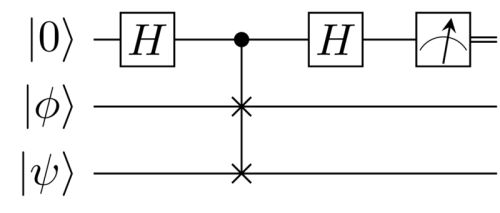

- **Step 1**: We initialize the quantum circuit with the qubit state of $|0, \phi, \psi\rangle$, where $|0\rangle$ is the measuring qubit, and both $|\phi\rangle$ and $|\psi\rangle$ are two $m$-qubit states.

- **Step 2**: We apply the H-gate on the measuring qubit, followed by controlled-SWAP gate (CSWAP-gate) with controlling $|0\rangle$ and targeting two qubits $|\phi\rangle$ and $|\psi\rangle$, and followed by the H-gate on the measuring qubit.

- **Step 3**: Lastly, we measure the measuring qubit to get $Pr(|0\rangle)$ or $Pr(|1\rangle)$ to estimate $\big\vert\langle\psi\vert\phi\rangle\big\vert^2$.    

| Observable           | Measurement value                                                        |
|:--------------------:|:------------------------------------------------------------------------:|
| $Pr(\vert0\rangle)$  | $\frac{1}{2}+\frac{1}{2}\big\vert\langle\psi\vert\phi\rangle\big\vert^2$ |
| $Pr(\vert1\rangle)$  | $\frac{1}{2}-\frac{1}{2}\big\vert\langle\psi\vert\phi\rangle\big\vert^2$ |
| $\langle Z \rangle$  | $\big\vert\langle\psi\vert\phi\rangle\big\vert^2$                        |

### 2.3.2 The quantum circuit of the Swap test
- Let's creat a quantum circuit of the Superdense Coding Protocol.

- First, perform a Swap test between $|0\rangle$ and $|0\rangle$.

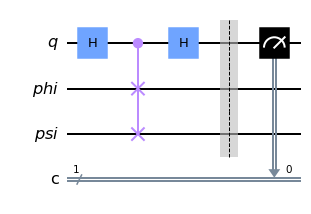

In [7]:
## Create a Swap test quantum circuit shown above.

# Create a quantum register
num_mqubit = 1
q = QuantumRegister(size = 1, name = 'q')
phi = QuantumRegister(size = num_mqubit, name = 'phi')
psi = QuantumRegister(size = num_mqubit, name = 'psi')

# Create a classical register
c = ClassicalRegister(1,'c')

# Create the quantum circuit of the swap test
qc_swap1 = QuantumCircuit(q, phi, psi, c)
########## FILL YOUR CODE IN HERE ##########
qc_swap1.h(q)
qc_swap1.cswap(control_qubit = q, target_qubit1 = phi, target_qubit2 = psi)
qc_swap1.h(q)
qc_swap1.barrier()
qc_swap1.measure(qubit = q, cbit = c)
########## ---------------------- ##########

qc_swap1.draw(output = 'mpl')

Counts:  {'0': 4096}
Estimated the Squared inner product:  1.0
Estimated <Z> expectation:  1.0


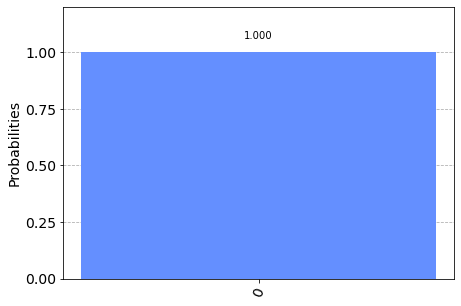

In [8]:
## Let's see the result of the swap test.

# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_swap1 = execute(qc_swap1, backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_swap1 = job_swap1.result().get_counts()

# print the result
print("Counts: ", counts_swap1)
print("Estimated the Squared inner product: ", str(2*(counts_swap1['0']/num_shots) - 1))
print("Estimated <Z> expectation: ", (counts_swap1['0']/num_shots))
plot_histogram(counts_swap1)

- Second, perform a Swap test between $|0\rangle$ and $|1\rangle$.

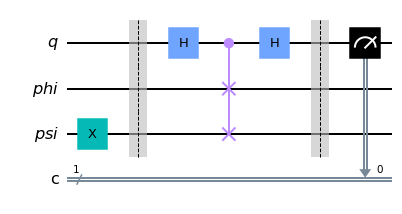

In [9]:
## Create a Swap test quantum circuit.

# Create a quantum register
num_mqubit = 1
q = QuantumRegister(size = 1, name = 'q')
phi = QuantumRegister(size = num_mqubit, name = 'phi')
psi = QuantumRegister(size = num_mqubit, name = 'psi')

# Create a classical register
c = ClassicalRegister(1,'c')

# Create the quantum circuit of the swap test
########## FILL YOUR CODE IN HERE ##########
qc_swap2 = QuantumCircuit(q, phi, psi, c)
qc_swap2.x(2)
qc_swap2.barrier()
qc_swap2.h(q)
qc_swap2.cswap(control_qubit = q, target_qubit1 = phi, target_qubit2 = psi)
qc_swap2.h(q)
qc_swap2.barrier()
qc_swap2.measure(qubit = q, cbit = c)
########## ---------------------- ##########

qc_swap2.draw(output = 'mpl')

Counts:  {'0': 2037, '1': 2059}
Estimated the squared inner product:  -0.00537109375
Estimated <Z> expectation:  -0.00537109375


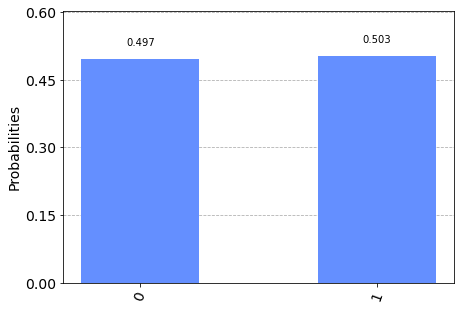

In [10]:
## Let's see the result of the swap test

# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_swap2 = execute(qc_swap2, backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_swap2 = job_swap2.result().get_counts()

# print the result
print("Counts: ", counts_swap2)
print("Estimated the squared inner product: ", str(2*(counts_swap2['0']/num_shots) - 1))
print("Estimated <Z> expectation: ", (counts_swap2['0']/num_shots)-(counts_swap2['1']/num_shots))
plot_histogram(counts_swap2)

### Exercise 3.1: Swap test

- Perform the Swap test that compares two given states. First, build a quantum circuit, and execute the circuit using the QASM simulation.

    1) $|\phi\rangle = \frac{1}{\sqrt{2}}{\bigl(|0\rangle+|1\rangle\bigl)}$ and $|\psi\rangle = \alpha|0\rangle+\beta|1\rangle$, such that $|\alpha|^2 = 0.75$, and $|\beta|^2 = 0.25$

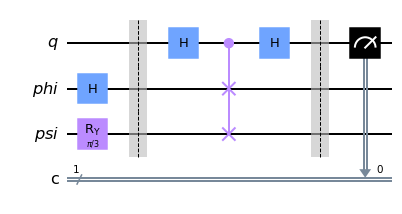

In [11]:
# Exercise 3.1) circuit
def qc_swap_ex3_1():
    # Create a quantum register with 3 qubits
    num_m_qubit = 1
    q = QuantumRegister(size = 1, name = 'q')
    phi = QuantumRegister(size = num_m_qubit, name = 'phi')
    psi = QuantumRegister(size = num_m_qubit, name = 'psi')
    # Create a classical register with 3 bits
    c = ClassicalRegister(1, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q, phi, psi, c)
    ########## FILL YOUR CODE IN HERE ##########
    
    ## Initialization
    qc.h(phi[0]) # phi
    qc.ry(theta = pi/3, qubit = psi[0]) # psi
    qc.barrier()
    
    ## Gate operation
    qc.h(0)
    qc.cswap(control_qubit = q, target_qubit1 = phi, target_qubit2 = psi)
    qc.h(0)
    qc.barrier()
    
    ## Measurement
    qc.measure(q, c)  
    
    ########## ---------------------- ##########
    return(qc)

# Draw the quantum circuit in a different style
qc_swap_ex3_1().draw(output='mpl')

Counts:  {'0': 3954, '1': 142}
Estimated the squared inner product:  0.9306640625
Estimated <Z> expectation:  0.9306640625


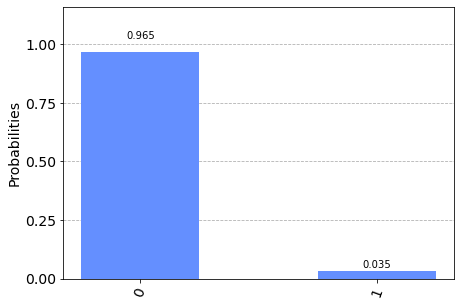

In [12]:
# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_swap_ex3_1 = execute(qc_swap_ex3_1(), backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_swap_ex3_1 = job_swap_ex3_1.result().get_counts()

# print the result
print("Counts: ", counts_swap_ex3_1)
print("Estimated the squared inner product: ", str(2*(counts_swap_ex3_1['0']/num_shots) - 1))
if '1' not in list(counts_swap_ex3_1.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_1['0']/num_shots)
elif '0' not in list(counts_swap_ex3_1.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_1['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_swap_ex3_1['0']/num_shots - counts_swap_ex3_1['1']/num_shots))
plot_histogram(counts_swap_ex3_1)

### Exercise 3.2: Swap test

- Perform the Swap test that compares two given states. First, build a quantum circuit, and execute the circuit using the QASM simulation.

    2) Two Bell states: $|\phi\rangle = \frac{1}{\sqrt{2}}{\bigl(|00\rangle+|11\rangle\bigl)}$ and $|\psi\rangle = \frac{1}{\sqrt{2}}{\bigl(|01\rangle+|10\rangle\bigl)}$

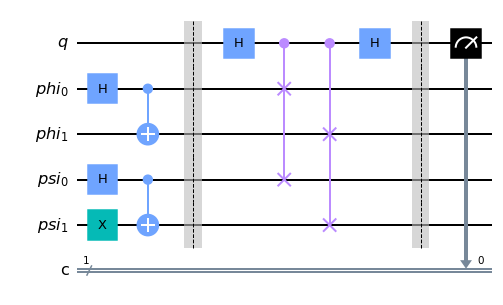

In [13]:
# Exercise 3.2)
def qc_swap_ex3_2():
    # Create a quantum register with 3 qubits
    num_m_qubit = 2
    q = QuantumRegister(size = 1, name = 'q')
    phi = QuantumRegister(size = num_m_qubit, name = 'phi')
    psi = QuantumRegister(size = num_m_qubit, name = 'psi')
    # Create a classical register with 3 bits
    c = ClassicalRegister(1, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q, phi, psi, c)
    ########## FILL YOUR CODE IN HERE ##########
    
    ## Initialization
    qc.h(phi[0])
    qc.cx(control_qubit = phi[0], target_qubit = phi[1])
    qc.h(psi[0])
    qc.x(psi[1])
    qc.cx(control_qubit = psi[0], target_qubit = psi[1])
    qc.barrier()
    
    ## Gate operation
    qc.h(0)
    for i in range(num_m_qubit):
        qc.cswap(control_qubit = q, target_qubit1 = phi[i], target_qubit2 = psi[i])
    qc.h(0)
    qc.barrier()
    
    ## Measurement
    qc.measure(q, c)  
    
    ########## ---------------------- ##########
    return(qc)

# Draw the quantum circuit in a different style
qc_swap_ex3_2().draw(output='mpl')

Counts:  {'1': 2004, '0': 2092}
Estimated the squared inner product:  0.021484375
Estimated <Z> expectation:  0.021484375


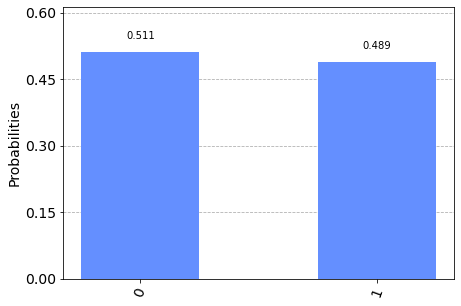

In [14]:
# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_swap_ex3_2 = execute(qc_swap_ex3_2(), backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_swap_ex3_2 = job_swap_ex3_2.result().get_counts()

# print the result
print("Counts: ", counts_swap_ex3_2)
print("Estimated the squared inner product: ", str(2*(counts_swap_ex3_2['0']/num_shots) - 1))
if '1' not in list(counts_swap_ex3_2.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_2['0']/num_shots)
elif '0' not in list(counts_swap_ex3_2.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_2['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_swap_ex3_2['0']/num_shots - counts_swap_ex3_2['1']/num_shots))
plot_histogram(counts_swap_ex3_2)

### Exercise 3.3: Swap test

- Perform the Swap test that compares two given states. First, build a quantum circuit, and execute the circuit using the QASM simulation.

    3) Two GHZ states:
    - $|\phi\rangle = \alpha|000\rangle+\beta|111\rangle$, with $|\alpha|^2 = 0.75$, and $|\beta|^2 = 0.25$
    - $|\psi\rangle = \alpha|000\rangle+\beta|111\rangle$, with $|\alpha|^2 = 0.25$, and $|\beta|^2 = 0.75$

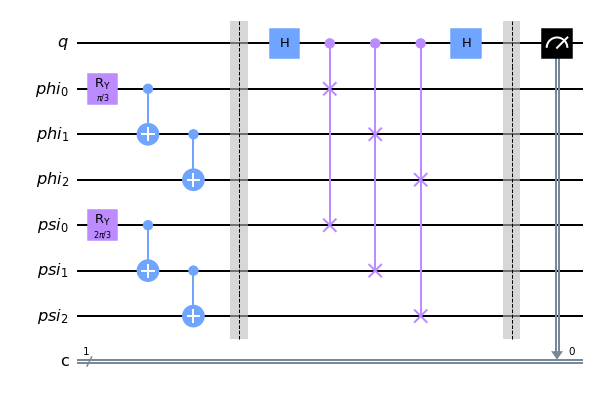

In [15]:
# Exercise 3.3)
def qc_swap_ex3_3():
    # Create a quantum register with 3 qubits
    num_m_qubit = 3
    q = QuantumRegister(size = 1, name = 'q')
    phi = QuantumRegister(size = num_m_qubit, name = 'phi')
    psi = QuantumRegister(size = num_m_qubit, name = 'psi')
    # Create a classical register with 3 bits
    c = ClassicalRegister(1, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q, phi, psi, c)
    ########## FILL YOUR CODE IN HERE ##########
    
    ## Initialization
    qc.ry(theta = pi/3, qubit = phi[0])
    qc.cx(control_qubit = phi[0], target_qubit = phi[1])
    qc.cx(control_qubit = phi[1], target_qubit = phi[2])
    qc.ry(theta = 2*pi/3, qubit = psi[0])
    qc.cx(control_qubit = psi[0], target_qubit = psi[1])
    qc.cx(control_qubit = psi[1], target_qubit = psi[2])
    qc.barrier()
    
    ## Gate operation
    qc.h(0)
    for i in range(num_m_qubit):
        qc.cswap(control_qubit = q, target_qubit1 = phi[i], target_qubit2 = psi[i])
    qc.h(0)
    qc.barrier()
    
    ## Measurement
    qc.measure(q, c)  
    
    ########## ---------------------- ##########
    return(qc)

# Draw the quantum circuit in a different style
qc_swap_ex3_3().draw(output='mpl')

Counts:  {'0': 3609, '1': 487}
Estimated the squared inner product:  0.76220703125
Estimated <Z> expectation:  0.76220703125


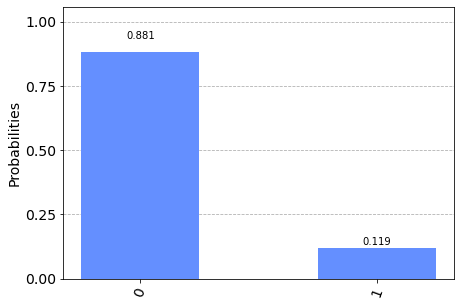

In [16]:
# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_swap_ex3_3 = execute(qc_swap_ex3_3(), backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_swap_ex3_3 = job_swap_ex3_3.result().get_counts()

# print the result
print("Counts: ", counts_swap_ex3_3)
print("Estimated the squared inner product: ", str(2*(counts_swap_ex3_3['0']/num_shots) - 1))
if '1' not in list(counts_swap_ex3_3.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_3['0']/num_shots)
elif '0' not in list(counts_swap_ex3_3.keys()):
    print("Estimated <Z> expectation: ", counts_swap_ex3_3['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_swap_ex3_3['0']/num_shots - counts_swap_ex3_3['1']/num_shots))
plot_histogram(counts_swap_ex3_3)

## 2.4 Hadamard test
 - Let $U$ be a unitary gate acting on the space of m-qubit state $|\psi\rangle$.
     - $U^{\dagger}U=UU^{\dagger}=I$, and $\langle\psi|\psi\rangle=1$
 - The Hadamard test is a method used in quantum computation used to create a random variable whose expected value is the expected real part $Re(\langle\psi\vert U \vert\psi\rangle)$.
 - That is, the Hadamard test produces a random variable whose image is in $\bigl\{+1, -1\bigl\}$ and whose expected value is exactly $Re(\langle\psi\vert U \vert\psi\rangle)$. 
 - With modification of the quantum circuit of the Hadamard test, you can also produce a random variable whose expected value is $Im(\langle\psi\vert U \vert\psi\rangle)$.
 - Link: [Wikipedia - Hadamard test](https://en.wikipedia.org/wiki/Hadamard_test_(quantum_computation))

### 2.4.1 The procedure of the Hadamard test

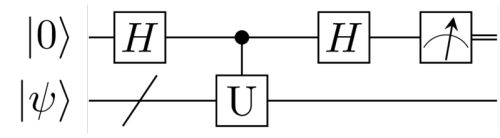

- **Step 1**: We initialize the quantum circuit with the qubit state of $|0\rangle|\psi\rangle$, where $|0\rangle$ is the measuring qubit, and $|\psi\rangle$ is a $m$-qubit state.

- **Step 2**: We apply the H-gate on the measuring qubit, followed by controlled-Unitary gate (C-U gate) with controlling $|0\rangle$ and the target qubit $|\psi\rangle$, and followed by the H-gate on the measuring qubit.

- **Step 3**: Lastly, we measure $\langle Z \rangle$ to get $Re(\langle\psi\vert U \vert\psi\rangle)$.
    - $\langle Z \rangle = (1)\times Pr(|0\rangle)+(-1)\times Pr(|1\rangle)$

- By the circuit diagram, we have our state vector from:
    - $|\Phi_0\rangle = |0\rangle \otimes |\psi\rangle$ $\mapsto$ $\cdots$ $\mapsto$ $|\Phi_f\rangle = \frac{1}{2}{\bigl( |0\rangle(I+U)|\psi\rangle + |1\rangle(I-U)|\psi\rangle \bigl)}$
    
| Observable           | Measurement value                                                   |
|:--------------------:|:-------------------------------------------------------------------:|
| $Pr(\vert0\rangle)$  | $\frac{1}{2}{\big[1+Re(\langle\psi\vert U \vert\psi\rangle)\big]}$  |
| $Pr(\vert1\rangle)$  | $\frac{1}{2}{\big[1-Re(\langle\psi\vert U \vert\psi\rangle)\big]}$  |
| $\langle Z \rangle$  | $Re(\langle\psi\vert U \vert\psi\rangle)$                           |

### 2.3.2 The quantum circuit of the Hadamard Test
- Let's creat a quantum circuit of the Hadamard test.

- First, perform a Hadamard test with $|\psi\rangle = |0\rangle$, and $U=X$

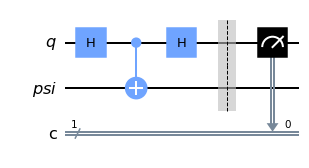

In [17]:
## Create a Hadamard test quantum circuit shown above.

# Create a quantum register
num_mqubit = 1
q = QuantumRegister(size = 1, name = 'q')
psi = QuantumRegister(size = num_mqubit, name = 'psi')

# Create a classical register
c = ClassicalRegister(1,'c')

# Create the quantum circuit of the swap test
qc_hada1 = QuantumCircuit(q, psi, c)
########## FILL YOUR CODE IN HERE ##########
qc_hada1.h(q)
qc_hada1.cx(q, psi)
qc_hada1.h(q)
qc_hada1.barrier()
qc_hada1.measure(qubit = q, cbit = c)
########## ---------------------- ##########

qc_hada1.draw(output = 'mpl')

Counts:  {'1': 2039, '0': 2057}
Estimated <Z> expectation:  0.00439453125


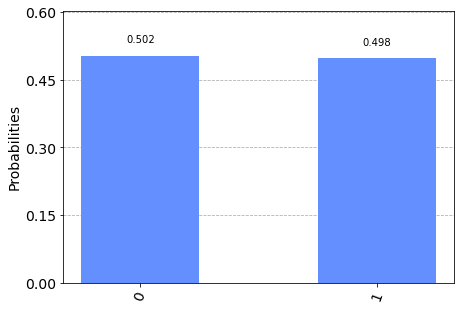

In [18]:
## Let's see the result of the swap test.

# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_hada1 = execute(qc_hada1, backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_hada1 = job_hada1.result().get_counts()

# print the result
print("Counts: ", counts_hada1)
if '1' not in list(counts_hada1.keys()):
    print("Estimated <Z> expectation: ", counts_hada1['0']/num_shots)
elif '0' not in list(counts_hada1.keys()):
    print("Estimated <Z> expectation: ", counts_hada1['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_hada1['0']/num_shots - counts_hada1['1']/num_shots))
plot_histogram(counts_hada1)

- Second, perform a Hadamard test with $|\psi\rangle = |+\rangle=\frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle\big)$, and $U=X$

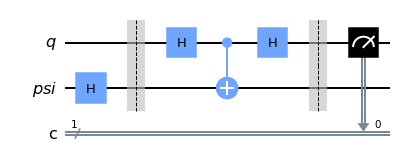

In [19]:
## Create a Hadamard test quantum circuit shown above.

# Create a quantum register
num_mqubit = 1
q = QuantumRegister(size = 1, name = 'q')
psi = QuantumRegister(size = num_mqubit, name = 'psi')

# Create a classical register
c = ClassicalRegister(1,'c')

# Create the quantum circuit of the swap test
qc_hada2 = QuantumCircuit(q, psi, c)
########## FILL YOUR CODE IN HERE ##########
qc_hada2.h(psi)
qc_hada2.barrier()
qc_hada2.h(q)
qc_hada2.cx(control_qubit = q, target_qubit = psi)
qc_hada2.h(q)
qc_hada2.barrier()
qc_hada2.measure(qubit = q, cbit = c)
########## ---------------------- ##########

qc_hada2.draw(output = 'mpl')

Counts:  {'0': 4096}
Estimated <Z> expectation:  1.0


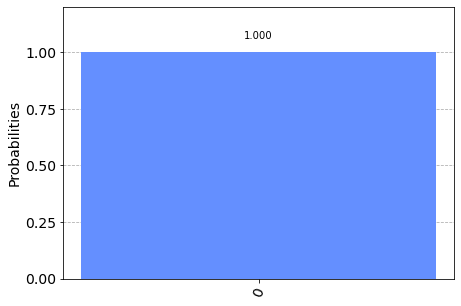

In [20]:
## Let's see the result of the swap test.

# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_hada2 = execute(qc_hada2, backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_hada2 = job_hada2.result().get_counts()

# print the result
print("Counts: ", counts_hada2)
if '1' not in list(counts_hada2.keys()):
    print("Estimated <Z> expectation: ", counts_hada2['0']/num_shots)
elif '0' not in list(counts_hada2.keys()):
    print("Estimated <Z> expectation: ", counts_hada2['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_hada2['0']/num_shots - counts_hada2['1']/num_shots))
plot_histogram(counts_hada2)

### Exercise 4.1: Hadamard test

- Perform the Hadamard test with given quantum state $\psi\rangle$ and the unitary gate $U$. First, build a quantum circuit, and execute the circuit using the QASM simulation.

    1) Perform a Hadamard test with $|\psi\rangle = |1\rangle$, and $U=R_{z}(\pi/2)$ to get the estimated $Re\big(\langle1|U|1\rangle\big)$.
 - Hint: Use the CRZ gate using `QuantumCircuit.crz(theta, control_qubit, target_qubit)`
 - Hint: $R_{z}(\theta)= \begin{bmatrix} e^{-\theta i} & 0 \\ 0 & e^{+\theta i}\end{bmatrix}$, where $e^{\pm i\theta}=cos(\theta)\pm i\cdot sin(\theta)$

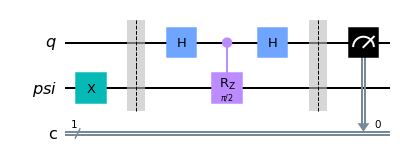

In [21]:
# Exercise 4.1)
def qc_hada_ex4_1():
    # Create a quantum register with 3 qubits
    num_m_qubit = 1
    q = QuantumRegister(size = 1, name = 'q')
    psi = QuantumRegister(size = num_m_qubit, name = 'psi')
    # Create a classical register with 3 bits
    c = ClassicalRegister(1, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q, psi, c)
    ########## FILL YOUR CODE IN HERE ##########
    
    ## Initialization
    qc.x(psi)
    qc.barrier()
    
    ## Gate operation
    qc.h(0)
    qc.crz(theta = pi/2, control_qubit = q, target_qubit = psi)
    qc.h(0)
    qc.barrier()
    
    ## Measurement
    qc.measure(q, c)  
    
    ########## ---------------------- ##########
    return(qc)

# Draw the quantum circuit in a different style
qc_hada_ex4_1().draw(output='mpl')

Counts:  {'0': 3498, '1': 598}
Estimated <Z> expectation:  0.7080078125


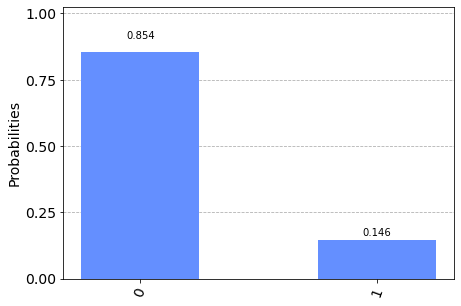

In [22]:
# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_hada_ex4_1 = execute(qc_hada_ex4_1(), backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_hada_ex4_1 = job_hada_ex4_1.result().get_counts()

# print the result
print("Counts: ", counts_hada_ex4_1)
if '1' not in list(counts_hada_ex4_1.keys()):
    print("Estimated <Z> expectation: ", counts_hada_ex4_1['0']/num_shots)
elif '0' not in list(counts_hada_ex4_1.keys()):
    print("Estimated <Z> expectation: ", counts_hada_ex4_1['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_hada_ex4_1['0']/num_shots - counts_hada_ex4_1['1']/num_shots))
plot_histogram(counts_hada_ex4_1)

- In Qiskit, since $R_{z}(\pi/2)= \frac{1}{\sqrt{2}}\begin{bmatrix} 1-i & 0 \\ 0 & 1+i \end{bmatrix}$, we have $\langle1|R_{z}(\pi/2)|1\rangle = \frac{1}{\sqrt{2}}(1+i)$ $\Rightarrow$ $Re\big(\langle1|R_{z}(\pi/2)|1\rangle\big) = \frac{1}{\sqrt{2}} \approx 0.7071$

### Exercise 4.2: Hadamard test

 - Perform the Hadamard test with given quantum state $\psi\rangle$ and the unitary gate $U$. First, build a quantum circuit, and execute the circuit using the QASM simulation.

    2) Perform a Hadamard test with $|\psi\rangle = |0\rangle$, and $U=R_{z}(\pi/2)$ to get the estimated $Im\big(\langle0|U|0\rangle\big)$.
    - Hint: Instead of applying first H-gate to get $|+\rangle$ state, try to get $|-i\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle-i|1\rangle\big)$ state using $S^{\dagger}$ gate, where $S^{\dagger}=R_{z}(-\pi/2)$.
    - Hint: Use the S-dagger gate using `QuantumCircuit.sdg(qubit)`

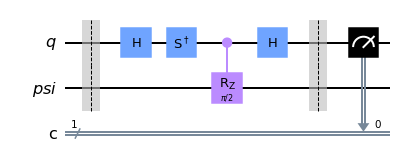

In [23]:
# Exercise 4.2)
def qc_hada_ex4_2():
    # Create a quantum register with 3 qubits
    num_m_qubit = 1
    q = QuantumRegister(size = 1, name = 'q')
    psi = QuantumRegister(size = num_m_qubit, name = 'psi')
    # Create a classical register with 3 bits
    c = ClassicalRegister(1, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q, psi, c)
    ########## FILL YOUR CODE IN HERE ##########
    
    ## Initialization
    qc.barrier()
    
    ## Gate operation
    qc.h(0)
    qc.sdg(0)
    qc.crz(theta = pi/2, control_qubit = q, target_qubit = psi)
    qc.h(0)
    qc.barrier()
    
    ## Measurement
    qc.measure(q, c)  
    
    ########## ---------------------- ##########
    return(qc)

# Draw the quantum circuit in a different style
qc_hada_ex4_2().draw(output='mpl')

Counts:  {'0': 584, '1': 3512}
Estimated <Z> expectation:  -0.71484375


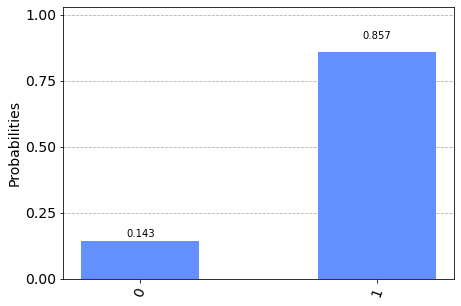

In [24]:
# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
num_shots = 4096
job_hada_ex4_2 = execute(qc_hada_ex4_2(), backend_q, shots=num_shots)

# Get the counts number to estimate the squared inner product.
counts_hada_ex4_2 = job_hada_ex4_2.result().get_counts()

# print the result
print("Counts: ", counts_hada_ex4_2)
if '1' not in list(counts_hada_ex4_2.keys()):
    print("Estimated <Z> expectation: ", counts_hada_ex4_2['0']/num_shots)
elif '0' not in list(counts_hada_ex4_2.keys()):
    print("Estimated <Z> expectation: ", counts_hada_ex4_2['1']/num_shots)
else: print("Estimated <Z> expectation: ", (counts_hada_ex4_2['0']/num_shots - counts_hada_ex4_2['1']/num_shots))
plot_histogram(counts_hada_ex4_2)

- In Qiskit, since $R_{z}(\pi/2)= \frac{1}{\sqrt{2}}\begin{bmatrix} 1-i & 0 \\ 0 & 1+i \end{bmatrix}$, we have $\langle0|R_{z}(\pi/2)|0\rangle = \frac{1}{\sqrt{2}}(1-i)$ $\Rightarrow$ $Im\big(\langle0|R_{z}(\pi/2)|0\rangle\big) = -\frac{1}{\sqrt{2}} \approx -0.7071$

## 2.5 Deutsch-Jozsa Algorithm
 - The Deutsch-Jorza algorithm is a deterministic quantum algorithm proposed by David Deutsch and Richard Jozsa in 1992.
 - It is one of the first example of a quantum algorithm that is exponentially faster than any possible deterministic classical algorithm.
 
 - Link: [Wikipedia - Deutsch–Jozsa algorithm](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm)

### 2.5.1 The procedure of the Deutsch-Jozsa Algorithm

- Deutsch-Jozsa Problem: We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$.
    - That is: $f(\{x_0, x_1, x_2, ... \})= 0$ or $1$, where $x_n$ is $0$ or $1$.
- The property of the given Boolean function $f$ is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant.
- Using a quantum computer, we can solve this probelm with 100% confidence after only one call to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle, which maps the state $\vert x\rangle\vert y\rangle$ to $\vert x\rangle\vert y \oplus f(x)\rangle$, where $\oplus$ is addition modulo $2$.
- Below is the generic circuit for the Deutsch-Jozsa algorithm.

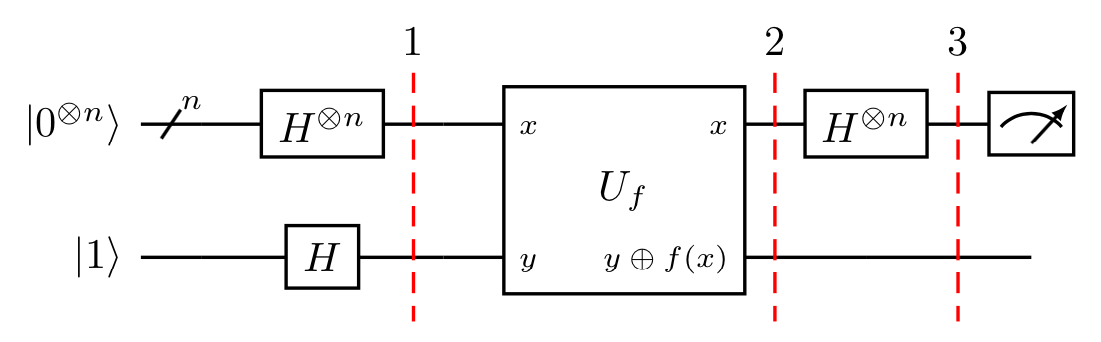

- Note that the Deutsch-Jozsa problem is an $n$-bit extension of the single bit Deutsch problem.


- **Step 1**: Prepare two sets of quantum registers. The first is an $n$-qubit register initialized to $\vert 0\rangle$, and the second is a one-qubit register initialized to $\vert 1\rangle$.
    - $\vert \psi_0 \rangle = \vert 0\rangle^{\otimes{n}}\vert 1\rangle$

- **Step 2**: We apply the H-gate to each qubits:
    - $\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^{n}-1} \vert x\rangle(\vert 0\rangle-\vert 1\rangle)$
    
- **Step 3**: We apply the quantum oracle $\vert x\rangle\vert y\rangle$ to $\vert x\rangle\vert y \oplus f(x)\rangle$:
    - $\vert \psi_2 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^{n}-1} \vert x\rangle(\vert f(x)\rangle-\vert 1 \oplus f(x)\rangle)$
    - $\vert \psi_2 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^{n}-1} (-1)^{f(x)}\vert x\rangle(\vert 0\rangle-\vert 1\rangle)$ since for each $x$, $f(x)$ is either $0$ or $1$.
    
- **Step 4**: At this point the second single qubit register may be ignored. Apply a Hadamard gate to each qubit in the first register:
    - $\vert \psi_3 \rangle = \frac{1}{2^{n+1}}\sum_{x=0}^{2^{n}-1} (-1)^{f(x)} \bigl[ \sum_{y=0}^{2^{n}-1} (-1)^{x \cdot y}\vert y \rangle \bigr]$
    - $\vert \psi_3 \rangle = \frac{1}{2^{n+1}}\sum_{x=0}^{2^{n}-1} \bigl[ \sum_{i=0}^{2^{n}-1} (-1)^{f(x)}(-1)^{x \cdot y} \bigr] \vert y \rangle$ where $x \cdot y = x_{0}y_{0}\oplus x_{1}y_{1}\oplus \cdots x_{n-1}y_{n-1}\oplus$ is the sum of the bitwise product.
    
- **Step 5**: Measure the first quantum register. 
    - Notice that the probability of measuring $\vert 0\rangle^{\otimes{n}} = \big| \frac{1}{2^{n+1}}\sum_{x=0}^{2^{n}-1} (-1)^{f(x)} \big|^2$, which evaluates to $Pr(\vert 0\rangle^{\otimes{n}})=1$ if $f(x)$ is constant and $Pr(\vert 0\rangle^{\otimes{n}})=0$ if $f(x)$ is balanced.

### 2.5.2 The quantum circuit of the Deutsch-Jozsa Algorithm
- Let's build the Deutsch-Jozsa algorithm for the example of a three-bit function, with both constant and balanced oracles.

- For a constant function, it is simple:
    1. if f(x) = 0, then apply the $I$ gate to the qubit in register 2.  
    2. if f(x) = 1, then apply the $X$ gate to the qubit in register 2.


- For a balanced function, there are many different circuits we can create. One of the ways we can guarantee our circuit is balanced is by performing a CNOT for each qubit in register 1, with the qubit in register 2 as the target. For example:

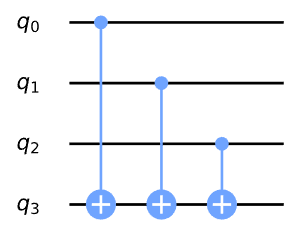

In the image above, the top three qubits form the input register, and the bottom qubit is the output register. We can see which input states give which output in the table below:

| Input states that output 0 | Input States that output 1 |
|:--------------------------:|:--------------------------:|
|             000            |             001            |
|             011            |             100            |
|             101            |             010            |
|             110            |             111            |

- We can change the results while keeping them balanced by wrapping selected controls in X-gates. For example, see the circuit and its results table below:

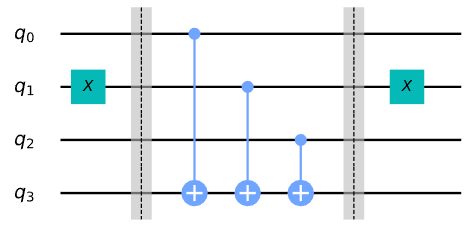

| Input states that output 0 | Input states that output 1 |
|:--------------------------:|:--------------------------:|
|             001            |             000            |
|             010            |             011            |
|             100            |             101            |
|             111            |             110            |

#### 2.5.2.1 Import code functions from packages

In [25]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

#### 2.5.2.2 Constant Oracle

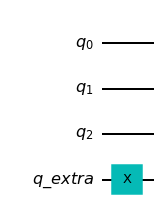

In [26]:
# set the length of the n-bit input string. 
num_qubit = 3

# Create a quantum register
q = QuantumRegister(size = num_qubit , name = 'q')
q_extra = QuantumRegister(size = 1, name = 'q_extra')

# Create the constant oracle
const_oracle = QuantumCircuit(q, q_extra)

# Randomly decide whether the function outputs all 0's or all 1's.
output = np.random.randint(2)
if output == 1:
    const_oracle.x(num_qubit)

# Draw the quantum circuit 
const_oracle.draw(output = 'mpl')

#### 2.5.2.3 Balanced Oracle

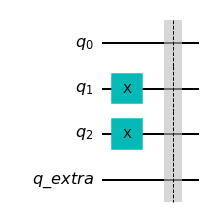

In [27]:
# Create the balanced oracle
balanced_oracle = QuantumCircuit(q, q_extra)
b_str = "011"

# Place X-gates by the given bit-string
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.barrier()

# Draw the quantum circuit 
balanced_oracle.draw(output = 'mpl')

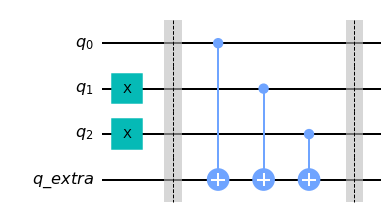

In [28]:
# Create the balanced oracle
balanced_oracle = QuantumCircuit(q, q_extra)
b_str = "011"

# Place X-gates by the given bit-string
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.barrier()

# Controlled-NOT gates
########## FILL YOUR CODE IN HERE ##########
for qubit in range(num_qubit):
    balanced_oracle.cx(qubit, num_qubit)
########## ---------------------- ##########
balanced_oracle.barrier()

# Draw the quantum circuit 
balanced_oracle.draw(output = 'mpl')

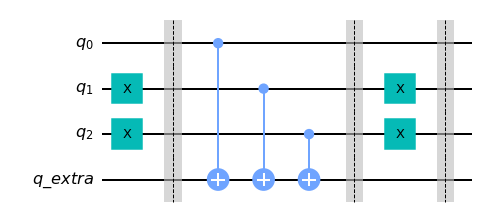

In [29]:
# Create the balanced oracle
balanced_oracle = QuantumCircuit(q, q_extra)
b_str = "011"

# Place X-gates by the given bit-string
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(num_qubit):
    balanced_oracle.cx(qubit, num_qubit)
balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.barrier()

# Draw the quantum circuit 
balanced_oracle.draw(output = 'mpl')

#### 2.5.2.4 The Full Algorithm 

- The Full Algorithm: Constant case

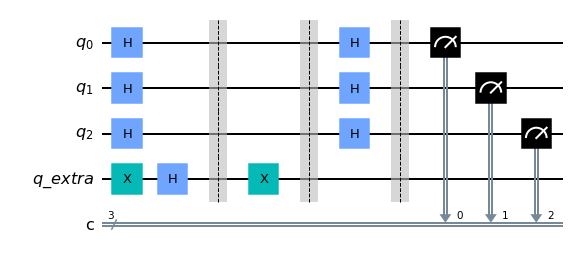

In [30]:
# set the length of the n-bit input string. 
num_qubit = 3

# Create a quantum register
q = QuantumRegister(size = num_qubit , name = 'q')
q_extra = QuantumRegister(size = 1, name = 'q_extra')
# Create a classical register
c = ClassicalRegister(num_qubit,'c')

# Create the quantum circuit of the  Deutsch-Jozsa Algorithm
dj_circuit = QuantumCircuit(q, q_extra, c)

# Apply H-gates
########## FILL YOUR CODE IN HERE ##########
for qubit in range(num_qubit):
    dj_circuit.h(qubit)

# Put extra qubit in state |->
dj_circuit.x(num_qubit)
dj_circuit.h(num_qubit)
dj_circuit.barrier()

# Add oracle - constant
dj_circuit.compose(const_oracle, inplace=True)
dj_circuit.barrier()

# Repeat H-gates
for qubit in range(num_qubit):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
dj_circuit.measure(q, c)
########## ---------------------- ##########

# Display circuit
dj_circuit.draw(output = 'mpl')

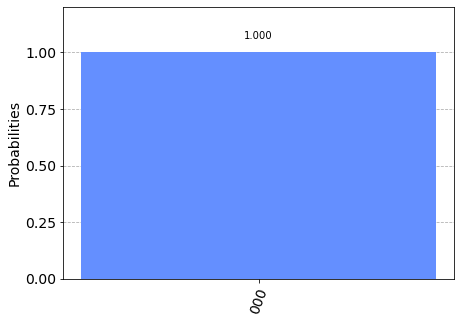

In [31]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

- Remember that $Pr(\vert 0\rangle^{\otimes{n}})=1$ if $f(x)$ is constant and $Pr(\vert 0\rangle^{\otimes{n}})=0$ if $f(x)$ is balanced.
- We can see from the results above that we have a 100% chance of measuring $000$. This correctly predicts the function is constant.

- The Full Algorithm: Balanced case

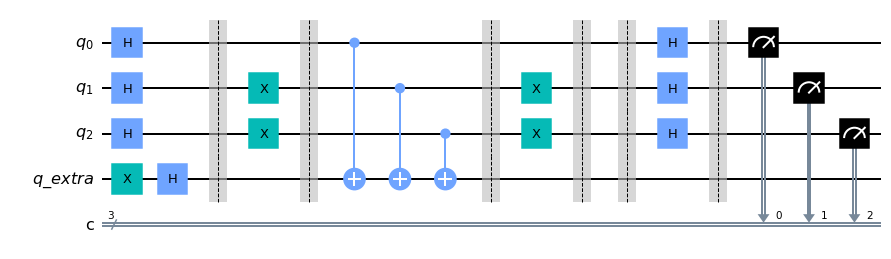

In [32]:
# set the length of the n-bit input string. 
num_qubit = 3

# Create a quantum register
q = QuantumRegister(size = num_qubit , name = 'q')
q_extra = QuantumRegister(size = 1, name = 'q_extra')
# Create a classical register
c = ClassicalRegister(num_qubit,'c')

# Create the quantum circuit of the  Deutsch-Jozsa Algorithm
dj_circuit = QuantumCircuit(q, q_extra, c)

# Apply H-gates
for qubit in range(num_qubit):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(num_qubit)
dj_circuit.h(num_qubit)
dj_circuit.barrier()

# Add oracle - balanced
########## FILL YOUR CODE IN HERE ##########
dj_circuit.compose(balanced_oracle, inplace=True)
dj_circuit.barrier()
########## ---------------------- ##########

# Repeat H-gates
for qubit in range(num_qubit):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# # Measure
dj_circuit.measure(q, c)

# Display circuit
dj_circuit.draw(output = 'mpl')

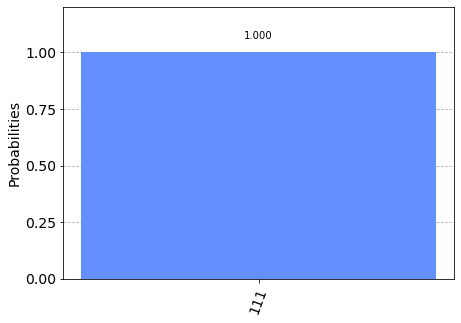

In [33]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

- Remember that $Pr(\vert 0\rangle^{\otimes{n}})=1$ if $f(x)$ is constant and $Pr(\vert 0\rangle^{\otimes{n}})=0$ if $f(x)$ is balanced.
- We can see from the results above that we have a 0% chance of measuring $000$. This correctly predicts the function is balanced.

### 2.5.3 Generalized circuit code of Deutsch-Jozsa Algorithm
- Here is a generalized code function that creates Deutsch-Jozsa oracles and turns them into quantum gates.
- It takes input as the type of the oracle, (either 'balanced' or 'constant') and n, the size of the input register.

In [34]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [35]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

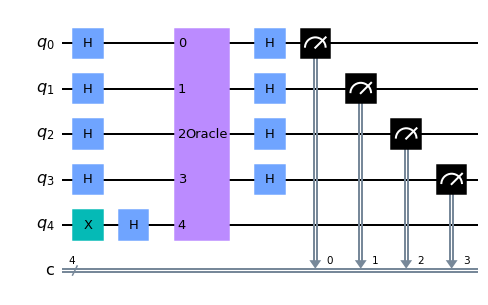

In [36]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw(output = 'mpl')

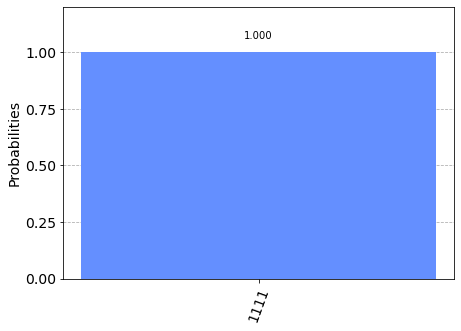

In [37]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

- Remember that $Pr(\vert 0\rangle^{\otimes{n}})=1$ if $f(x)$ is constant and $Pr(\vert 0\rangle^{\otimes{n}})=0$ if $f(x)$ is balanced.